This notebook is part of the ``deepcell-tf`` documentation: https://deepcell.readthedocs.io/.

# Multiplex cell segmentation

In [1]:
# Download multiplex data
from deepcell.datasets import multiplex_tissue
((X_train, y_train),(X_test, y_test)) = multiplex_tissue.load_data()

In [2]:
# select one of the images to display
i = 3
im = X_train[i:(i + 1)]
im.shape

(1, 512, 512, 2)

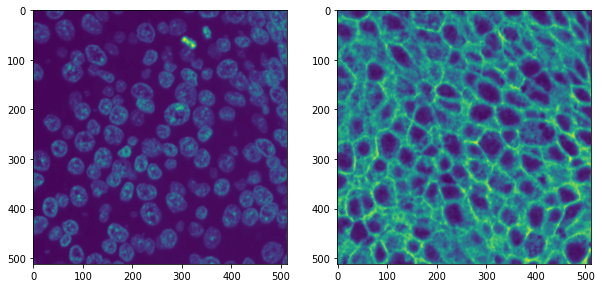

In [3]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(im[0, ..., 0])
ax[1].imshow(im[0, ..., 1])
plt.show()

## Whole Cell Segmentation

### Initialize multiplex model

The application will download pretrained weights for tissue segmentation. For more information about application objects, please see our [documentation](https://deepcell.readthedocs.io/en/master/API/deepcell.applications.html).

In [4]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation()

W0817 20:31:27.572619 140193208948544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


324329472/324321424 [==============================] - 14s 0us/step


## Use the application to generate labeled images

Typically, neural networks perform best on test data that is similar to the training data. In the realm of biological imaging, the most common difference between datasets is the resolution of the data measured in microns per pixel. The training resolution of the model can be identified using `app.model_mpp`.

In [5]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


The resolution of the input data can be specified in `app.predict` using the `image_mpp` option. The `Application` will rescale the input data to match the training resolution and then rescale to the original size before returning the labeled image.

In [6]:
labeled_im = app.predict(im, image_mpp=0.5)
labeled_im.shape

(1, 512, 512, 1)

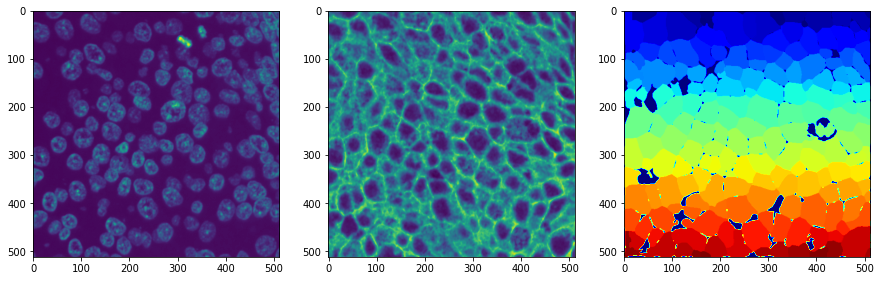

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(im[0, ..., 0])
ax[1].imshow(im[0, ..., 1])
ax[2].imshow(labeled_im[0, ..., 0], cmap='jet')
plt.show()

## Nuclear Cell Segmentation

In addition to predicting whole-cell segmentation, this application can also be used for nuclear predictions

In [8]:
labeled_nuc_im = app.predict(im, image_mpp=0.5, compartment='nuclear')
labeled_nuc_im.shape

(1, 512, 512, 1)

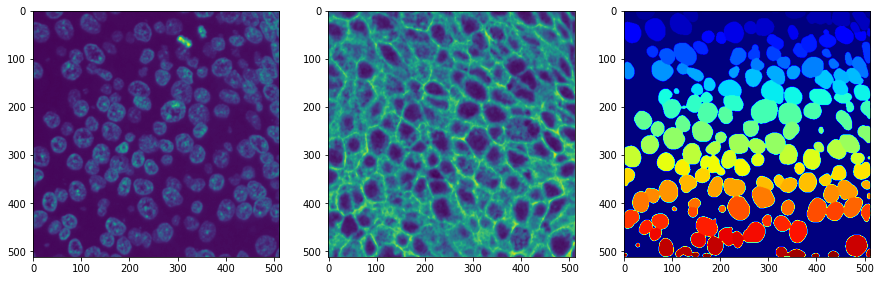

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(im[0, ..., 0])
ax[1].imshow(im[0, ..., 1])
ax[2].imshow(labeled_nuc_im[0, ..., 0], cmap='jet')
plt.show()